# __Tweets Clustering Experiment__

## __Data__

In [1]:
import pandas as pd
from modules import preprocessing as pp

In [2]:
tweets_df = pd.read_parquet('data/tweets/selected_tt_split.parquet')
tweets_df.shape

(1554613, 4)

In [3]:
tweets_df.head()

,author,user_description,tweet,hashtags
0,Sandroka131,“O Brasil que come não conhece o Brasil que te...,@zehdeabreu @verabr1 Mais de 100 pedidos de im...,"[CPIdaCovid, GenocidaDesgracado]"
1,thivagando,🏳️‍🌈 O antropólogo que logo sou...\nPalavras-c...,Quase 400 mil mortos no Brasil por Covid-19 e ...,"[BolsonaroGenocida, ForaBolsonaro]"
2,AndreaPorto2021,,@jnascim @planalto Que horror esse @jairbolson...,"[ImpeachmentDeBolsonaroUrgente, CPIdaCovid]"
3,Sandroka131,“O Brasil que come não conhece o Brasil que te...,O PT está se reunindo com especialistas da saú...,"[CPIdaCovid, FINES]"
4,HSarapeck,"Rubro-negro, carioca, eleitor de Lula e do PT ...","Intervenção militar para abrir boates, shoppin...","[CPIdaCovid, ImpeachmentDeBolsonaroUrgente]"


### Data Preprocessing

In [4]:
tweets_df['processed_tweet'] = tweets_df['tweet'].map(lambda x: pp.full_processing_pipeline(x))
tweets_df['keep_hashtags_tweet'] = tweets_df['tweet'].map(lambda x: pp.keep_hashtags_pipeline(x))
tweets_df['no_emoji_tweet'] = tweets_df['tweet'].map(lambda x: pp.no_emoji_pipeline(x))
tweets_df.head()

,author,user_description,tweet,hashtags,processed_tweet,keep_hashtags_tweet,no_emoji_tweet
0,Sandroka131,“O Brasil que come não conhece o Brasil que te...,@zehdeabreu @verabr1 Mais de 100 pedidos de im...,"[CPIdaCovid, GenocidaDesgracado]",pedidos impeachment segurados centrao anda qua...,pedidos impeachment segurados centrao cpidacov...,pedidos impeachment segurados centrao anda qua...
1,thivagando,🏳️‍🌈 O antropólogo que logo sou...\nPalavras-c...,Quase 400 mil mortos no Brasil por Covid-19 e ...,"[BolsonaroGenocida, ForaBolsonaro]",quase mil mortos brasil covid presidente,quase mil mortos brasil covid presidente bolso...,quase mil mortos brasil covid presidente
2,AndreaPorto2021,,@jnascim @planalto Que horror esse @jairbolson...,"[ImpeachmentDeBolsonaroUrgente, CPIdaCovid]",horror acerta,horror acerta impeachmentdebolsonarourgente cp...,horror acerta
3,Sandroka131,“O Brasil que come não conhece o Brasil que te...,O PT está se reunindo com especialistas da saú...,"[CPIdaCovid, FINES]",pt reunindo especialistas saude busca apoio do...,pt reunindo especialistas saude busca apoio cp...,pt reunindo especialistas saude busca apoio do...
4,HSarapeck,"Rubro-negro, carioca, eleitor de Lula e do PT ...","Intervenção militar para abrir boates, shoppin...","[CPIdaCovid, ImpeachmentDeBolsonaroUrgente]",tervencao militar abrir boates shoppings acade...,tervencao militar abrir boates shoppings acade...,tervencao militar abrir boates shoppings acade...


## __Clustering__

In [5]:
from wordcloud import WordCloud

### TF-IDF + KMeans

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

vec = TfidfVectorizer()
vec.fit(tweets_df['keep_hashtags_tweet'])
features = vec.transform(tweets_df['keep_hashtags_tweet'])
features.shape

(1554613, 221464)

In [7]:
sum_of_squared_distances = []
for k in range(2,11):
   print('Clustering K = ', k)
   km = KMeans(n_clusters=k)
   km.fit(features)
   sum_of_squared_distances.append(km.inertia_)

Clustering K =  2
Clustering K =  3
Clustering K =  4
Clustering K =  5
Clustering K =  6
Clustering K =  7
Clustering K =  8
Clustering K =  9
Clustering K =  10


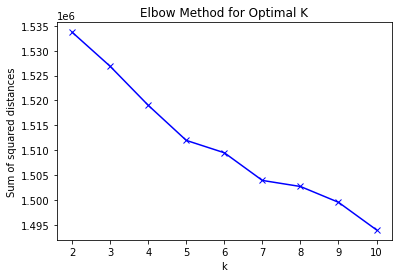

In [8]:
plt.plot(range(2,11), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [9]:
true_k = 7
model = KMeans(n_clusters=true_k)
model.fit(features)
labels = model.labels_

s_counts = pd.Series(labels).value_counts()
s_perc = pd.Series(labels).value_counts(normalize=True).values
for idx, val, perc in zip(s_counts.index, s_counts.values, s_perc):
    print(f'Cluster {idx}: {val} ({perc*100:.2f}%)')

Cluster 6: 714645 (45.97%)
Cluster 2: 606804 (39.03%)
Cluster 1: 84430 (5.43%)
Cluster 4: 80164 (5.16%)
Cluster 3: 28321 (1.82%)
Cluster 0: 20683 (1.33%)
Cluster 5: 19566 (1.26%)


In [10]:
result = pd.DataFrame({'user': tweets_df['author'], 'tweet': tweets_df['keep_hashtags_tweet'], 'hashtags':tweets_df['hashtags'] ,'cluster':labels})

In [11]:
for x in range(0, true_k):
    cluster_data = result[result['cluster']==x]
    hashtags_ = []
    for h_list in cluster_data['hashtags']:
        for ht in h_list:
            hashtags_.append(ht)
    s_counts_ = pd.Series(hashtags_).value_counts()[:15]
    s_perc_ = pd.Series(hashtags_).value_counts(normalize=True)[:15]
    print(f'\nCluster {x} top 15 hashtags:\n')
    for idx, val, perc in zip(s_counts_.index, s_counts_.values, s_perc_.values):
        print(f'#{idx}: {val} ({perc*100:.2f}%)')


Cluster 0 top 15 hashtags:

#CPIdaCovid: 5580 (15.50%)
#ForaBolsonaro: 5016 (13.94%)
#RenanVagabundo: 4464 (12.40%)
#CPIdoCirco: 3584 (9.96%)
#CPIdaPandemia: 1744 (4.85%)
#ForaBolsonaroGenocida: 1433 (3.98%)
#forabolsonaro: 372 (1.03%)
#CPIdoGenocidio: 356 (0.99%)
#BolsonaroGenocida: 296 (0.82%)
#CPIdaCOVID19: 252 (0.70%)
#ImpeachmentBolsonaroUrgente: 239 (0.66%)
#CPIdaVergonha: 222 (0.62%)
#ImpeachmentBolsonaro: 205 (0.57%)
#RenanCalheirosNaCadeia: 203 (0.56%)
#CPIdaCOVID: 191 (0.53%)

Cluster 1 top 15 hashtags:

#CPIdaCovid: 34684 (23.98%)
#ForaBolsonaro: 26947 (18.63%)
#CPIdaPandemia: 8492 (5.87%)
#ForaBolsonaroGenocida: 8228 (5.69%)
#CPIdoCirco: 5028 (3.48%)
#RenanVagabundo: 3005 (2.08%)
#CPIdoGenocidio: 2099 (1.45%)
#forabolsonaro: 1653 (1.14%)
#BolsonaroGenocida: 1648 (1.14%)
#ImpeachmentBolsonaroUrgente: 1554 (1.07%)
#CPIdaCOVID: 1477 (1.02%)
#BolsonaroVaiCair: 1190 (0.82%)
#cpidacovid: 1076 (0.74%)
#CPIdaCOVID19: 931 (0.64%)
#ForaGenocida: 860 (0.59%)

Cluster 2 top 15 hashtag

In [12]:
result.query('cluster == 0').sample(15)

,user,tweet,hashtags,cluster
1373778,AracildaHansen,marcos rogerio poderia dormir rolando chao rir...,[CPIdacovid],0
106652,marinawehner,momento cpidacovid senador pede atraves requer...,[CPIdaCovid],0
317448,AlexandreGallo6,dia cpidocirco tentara intimidar criminalizar ...,[CPIdoCirco],0
1027254,RM_Stier,assim governo vai fundir cabeca gado rolando c...,"[ForaBolsonaro, MoroPresidente, NemLulaNemBols...",0
1243269,saragui11,girao parabenizando marcos rogerio lucidez ros...,"[CPIdaCovid, CPIdaPandemia]",0
1323370,bahiantifacista,carluxo segue trabalhando rosto robo rosto pal...,"[ForaBolsonaro, ImpeachmentBolsonaro, Bolsonar...",0
1424021,ricarthamorim,kkkkkkkkkkkkkkkkkk vou salvar favoritos roland...,[CPIdaCovid],0
959355,nirsonico,governo ta usando pericia privada feita propri...,[CPIdaCovid],0
1006295,GiuliaJules88,coloquem logo microfone mao advogado rolando c...,"[EmanuelaMedrades, CPIdaPandemia, CpidaCovid]",0
994336,juliana_sann7,visto bozo cagando tanto pra cpidacovid rosto ...,[CPIdaCovid],0


In [13]:
result.query('cluster == 1').sample(15)

,user,tweet,hashtags,cluster
1508067,adrian_geek,homem vai ter treco vai la assistir cpidacovid,[CPIdaCovid],1
35841,jardimdaalmeri1,porque talvez pior presidente planeta pra fica...,"[CPIdoGenocidio, CPIdaPandemia]",1
703777,VictorM14648305,amorecos jeito satanas vulgo vai cair va pra p...,"[ForaBolsonaro, ForaBolsonaroGenocida, ForaBol...",1
562434,BrunettiMirna,hahah vaiado chamado genocida... vai voltar pr...,[ForaBolsonaroGenocida],1
928406,thomasalgarvio,cpidocirco vc presidente palhaco cpi palhacos ...,[CPIdoCirco],1
963723,marcio_acre,vai acontecer questao tempo cpidacovid audios ...,[CPIdaCovid],1
739049,dextervicente,senador pimentao vermelho vai ter infarto avc ...,[CPIdaCovid],1
281156,Cergimho,vai convocar osmar terra plana cpidacovid,[CPIdaCovid],1
1284994,itsmeheloisa,brasileiro unico animal vai protestar contra g...,"[7SForaBolsonaro, ForaBolsonaroGenocida]",1
860848,ArianeMastela,marcos rogerio terminar ler carta governo avis...,[CPIdaCovid],1


In [14]:
result.query('cluster == 2').sample(15)

,user,tweet,hashtags,cluster
187930,ItajahyCarol,misto vergonha nojo forabolsonarogenocida fora...,"[ForaBolsonaroGenocida, ForaBolsonaro, ForaGado]",2
387616,xiucrystallit,forabolsonaro sai poha,[ForaBolsonaro],2
1548585,Fafanete,paso nada governo forabolsonaro fim bolsafamil...,"[ForaBolsonaro, BolsaFamilia, jornaldacultura]",2
468449,LucilaML,critico porque amo imperfeito feitos forasalle...,"[ForaSalles, ForaBolsonaro]",2
659963,CostaMarcielle1,ao sinto vontade ouvir bolsonaro nada bom sai ...,[ForaBolsonaro],2
787992,Jaque29579048,maravilhosa falou tudo gostariamos falar corac...,[ForaBolsonaro],2
889327,BeibeDaniele,adrao vacina sobre forabolsonaro ladraodevacina,"[ForaBolsonaro, LadraodeVacina]",2
1498293,pcb_df,ultima dessa leva outubroforabolsonaro lotado ...,"[2OutubroForaBolsonaro, Lotado, forabolsonaro,...",2
533548,fabiana0biana,usem mascara genocida caralho forabolsonarogen...,[ForaBolsonaroGenocida],2
276852,Bozbobo1,vez genocida aglomerando espalhando virus bols...,"[ForaBolsonaro, BolsonaroGenocida]",2


In [15]:
result.query('cluster == 3').sample(15)

,user,tweet,hashtags,cluster
1067395,ptribeirao,caca checkmate coloca russia frente jogo nucle...,"[24JForaBolsonaro, CPIdaCOVID, RéuConfesso]",3
1255460,ptribeirao,video presidente cnbb pede paz respeito podere...,"[StopBolsonaroMundial, LulaLivreBrasilLivre, 7...",3
855652,ptribeirao,magens cameras seguranca shopping onde diretor...,"[LulaInocente, LulaPresidente, ForaBolsonaro]",3
1074885,ptribeirao,apos bolsonaro descumprir acordo stf dara resp...,"[ForaBolsonaro, LulaLivreBrasilLivre]",3
1234396,ptribeirao,pragmatismo aliancas oligarquias nucleo lucian...,"[StopBolsonaroMundial, LulaLivreBrasilLivre, 7...",3
789692,ptribeirao,diferencas chave negociacoes governo bolsonaro...,"[LulaInocente, LulaPresidente, ForaBolsonaro]",3
1130750,ptribeirao,video movimento denuncia novo acidente minerad...,"[ForaBolsonaro, LulaLivreBrasilLivre]",3
1067735,ptribeirao,defender paulo galo prisao arbitraria defender...,"[24JForaBolsonaro, CPIdaCOVID, RéuConfesso]",3
1114686,ptribeirao,protagonismo feminino garante medalhas olimpic...,"[ForaBolsonaro, LulaLivreBrasilLivre]",3
1033950,ptribeirao,coes africa sul nucleo luciano lepera rede pt ...,"[3JForaBolsonaro, CPIdaCOVID, RéuConfesso]",3


In [16]:
result.query('cluster == 4').sample(15)

,user,tweet,hashtags,cluster
172131,meudinhodovalle,pode chamar renanvagabundo,[RenanVagabundo],4
113710,jacqwalt,cobaias fala cpidavergonha renanvagabundo,"[CPIdaVergonha, RenanVagabundo]",4
164409,lourenco_kroth,cnnlixo dando espaco renanvagabundo merecem,"[CNNLixo, RenanVagabundo]",4
147836,ICaravieri,bota verdade nisto renanvagabundo,[RenanVagabundo],4
139836,ZK53953968,renanvagabundo mto vagabundo,[RenanVagabundo],4
285511,venturapqd,jantar renanvagabundo cpi esperavam estaria ao...,"[RenanVagabundo, CNNLixo]",4
145404,centralminas,falou alguma inverdade pode chamar renanvagabu...,"[RenanVagabundo, RenanVagabundo, CPIdaVergonha]",4
613960,BastosJusmari,acho renanvagabundo randolfevagabundo omaraziz...,"[RenanVagabundo, RandolfeVagabundo, OmarAzizVa...",4
144351,jacon_jett,renanvagabundo renan fim pablo colombia,[RenanVagabundo],4
129268,luciofernando78,toma distraido kkkkk renanvagabundo,[RenanVagabundo],4


In [17]:
result.query('cluster == 5').sample(15)

,user,tweet,hashtags,cluster
245779,crisvector,bom dia pra passar nervoso mentiras pazuello p...,"[PazuelloDay, CPIdaCOVID]",5
1366060,WeltonMartins14,bom dia somente favor forabolsonaro,[ForaBolsonaro],5
878602,ZelmaLCavalcant,bom dia forabolsonarogenocida impeachmentbolso...,"[ForaBolsonaroGenocida, ImpeachmentBolsonaroUr...",5
162413,RosaMar80779176,hoje dia forabolsonaro,[ForaBolsonaro],5
818242,Flamengo410Sul,bom dia pessoal paz cristo quero iniciar dia f...,[ForaBolsonaro],5
1539580,FlaviaChocair,bom dia feliz pra todos desejam forabolsonaro ...,"[ForaBolsonaro, ForaBolsonaroGenocida, ForaBol...",5
896033,feleskyky,frase dia bom dia brilhos forabolsonaro elenao,"[FORABOLSONARO, EleNao]",5
1366068,ValdemarSchmid1,bom dia pra vc companheiro forabolsonaro,[ForaBolsonaro],5
485852,lunnamoreira,dia mundial meio ambiente todo dia dia cuidar ...,"[ForaBolsonaro, ForaSalles]",5
1268882,daninabozny,primeiramente forabolsonarogenocida segunda me...,[ForaBolsonaroGenocida],5


In [18]:
result.query('cluster == 6').sample(15)

,user,tweet,hashtags,cluster
1471512,fernandesjoabe5,alem negacionista depoente hoje homofobico esc...,[CPIdaCovid],6
1429960,EduardaItsMe,deu ne cpidacovid,[CPIdaCovid],6
149029,RenataC30660282,exigimos retrate acaba chamar animais senador ...,"[ForaAmanda, foramarinho, ForaJoel, RenanVagab...",6
838585,tonylopes,jorginho cagando boca cpidapandemia,[CPIdaPandemia],6
820932,alcysio,argumento ridiculo quebra sigilo pode ser auto...,[cpidacovid],6
1475524,AnaNeryde,lucianohang havan cpidocirco,"[LucianoHang, Havan, CPIdoCirco]",6
865552,NapoleaMaracaja,urgente senador alessandro vieira cidadania pe...,"[CPIdaCovid, AoVivo]",6
292173,portaldcmais,menos nove governadores prefeitos ex prefeitos...,"[convocaçãodegovernadoreseprefeitos, cpidacovi...",6
1505968,FabioTalhari,bom dia amigos sessao cpidocirco hoje ainda de...,[CPIdoCirco],6
577909,AnarcoFino,cpidacovid pedindo esclarecimento sobre uso ve...,[CPIdaCovid],6


In [19]:
#result.query('cluster == 7').sample(15)

Cluster :  0


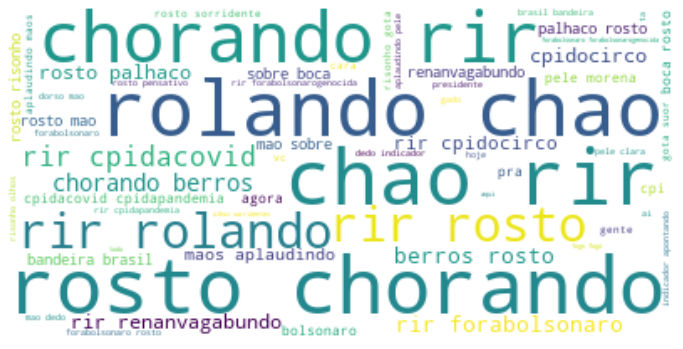

Cluster :  1


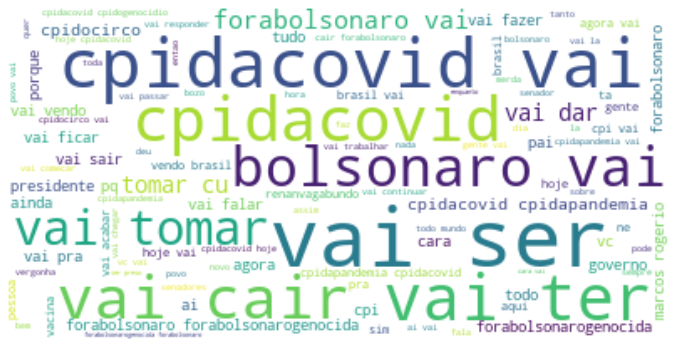

Cluster :  2


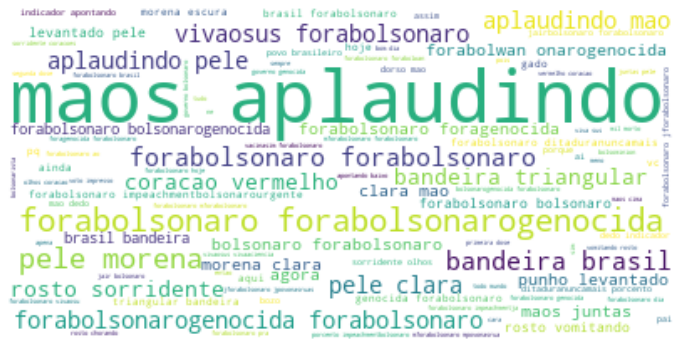

Cluster :  3


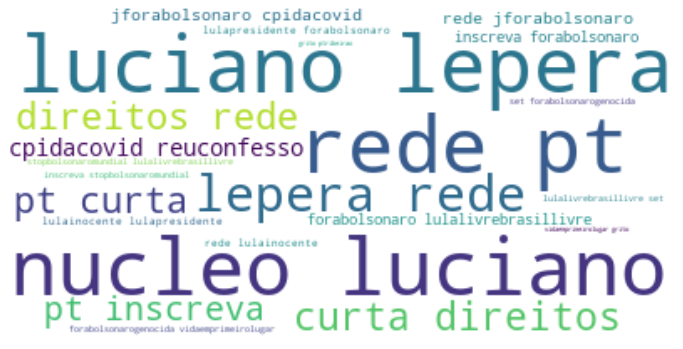

Cluster :  4


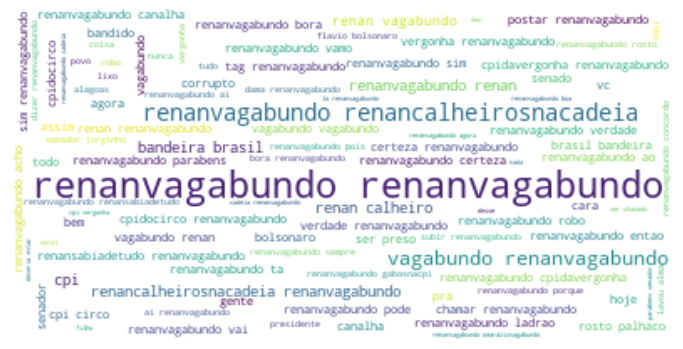

Cluster :  5


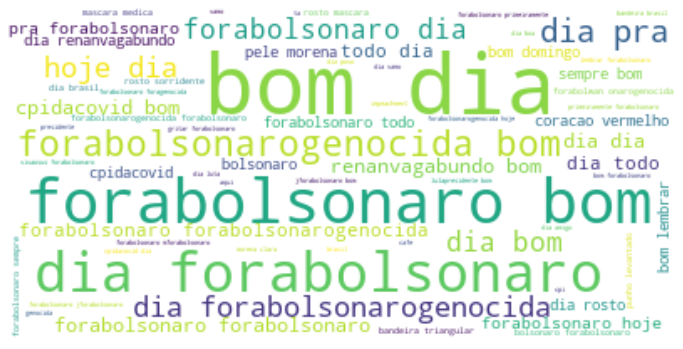

Cluster :  6


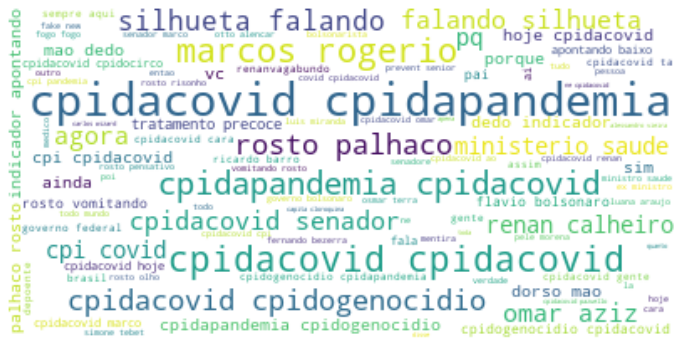

In [20]:
for k in range(0, true_k):
    s = result[result['cluster']==k]
    text = s['tweet'].str.cat(sep=' ')
    text = text.lower()
    text = ' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
    print('Cluster : ', k)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

### Embeddings (Transformers) + KMeans

In [21]:
from sentence_transformers import SentenceTransformer

#model = SentenceTransformer('adalbertojunior/distilbert-portuguese-cased')
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')

2022-03-13 21:24:00.340574: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-13 21:24:00.340618: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [22]:
#embeddings = model.encode(tweets_df['keep_hashtags_tweet'], show_progress_bar=True)
embeddings = model.encode(tweets_df['processed_tweet'], show_progress_bar=True)

Batches:   0%|          | 0/48582 [00:00<?, ?it/s]

In [ ]:
sum_of_squared_distances = []
for k in range(2,11):
   print('Clustering K = ', k)
   km = KMeans(n_clusters=k)
   km.fit(embeddings)
   sum_of_squared_distances.append(km.inertia_)

Clustering K =  2


In [ ]:
plt.plot(range(2,11), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [45]:
true_k = 5
model = KMeans(n_clusters=true_k)
model.fit(features)
labels = model.labels_


s_counts = pd.Series(labels).value_counts()
s_perc = pd.Series(labels).value_counts(normalize=True).values
for idx, val, perc in zip(s_counts.index, s_counts.values, s_perc):
    print(f'Cluster {idx}: {val} ({perc*100:.2f}%)')

Cluster 0: 50432 (60.69%)
Cluster 2: 20364 (24.51%)
Cluster 4: 8822 (10.62%)
Cluster 1: 2537 (3.05%)
Cluster 3: 946 (1.14%)


In [46]:
result = pd.DataFrame({'user': tweets_df['author'], 'tweet': tweets_df['keep_hashtags_tweet'], 'hashtags':tweets_df['hashtags'] ,'cluster':labels})

In [51]:
for x in range(0, true_k):
    cluster_data = result[result['cluster']==x]
    hashtags_ = []
    for h_list in cluster_data['hashtags']:
        for ht in h_list:
            hashtags_.append(ht)
    s_counts_ = pd.Series(hashtags_).value_counts()[:15]
    s_perc_ = pd.Series(hashtags_).value_counts(normalize=True)[:15]
    print(f'\nCluster {x} top 15 hashtags:\n')
    for idx, val, perc in zip(s_counts_.index, s_counts_.values, s_perc_.values):
        print(f'#{idx}: {val} ({perc*100:.2f}%)')


Cluster 0 top 15 hashtags:

#forabolsonaro: 50432 (20.69%)
#brasil: 20364 (4.70%)
#forabolsonarogenocida: 8822 (2.15%)
#vivaosus: 2537 (1.41%)
#covid19: 946 (1.40%)

Cluster 1 top 15 hashtags:

#forabolsonaro: 50432 (20.62%)
#cpidacovid: 20364 (5.27%)
#brasil: 8822 (3.28%)
#vivaosus: 2537 (2.71%)
#cpidocirco: 946 (2.11%)

Cluster 2 top 15 hashtags:

#cpidacovid: 50432 (39.99%)
#cpidapandemia: 20364 (6.87%)
#CPIdaCovid: 8822 (4.61%)
#CPIdaPandemia: 2537 (3.99%)
#cpidacovid19: 946 (1.60%)

Cluster 3 top 15 hashtags:

#covid19: 50432 (32.07%)
#coronavirus: 20364 (32.07%)
#vacinas: 8822 (11.02%)
#dosesAplicadas: 2537 (11.02%)
#covid19brasil: 946 (4.61%)

Cluster 4 top 15 hashtags:

#covid19: 50432 (16.68%)
#pandemia: 20364 (5.61%)
#coronavirus: 8822 (5.08%)
#vacina: 2537 (2.66%)
#brasil: 946 (2.47%)
